## About Dataset

Dataset ini merupakan dataset yang berisi daftar harga rumah yang dijual di wilayah JABODETABEK dengan susunan atribut-atributnya sebagai berikut:


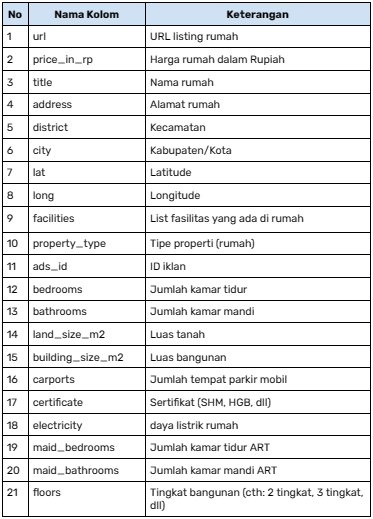

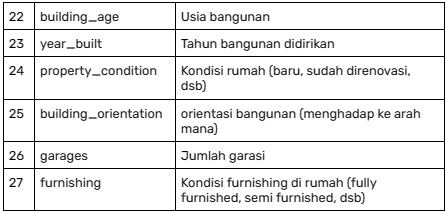

**Numerik Feature :**


*   price_in_rp (interval)
*   lat (interval)
*   long (interval)
*   bedrooms (rasio)
*   bathrooms (rasio)
*   land_size_m2 (rasio)
*   building_size_m2 (rasio)
*   carports (rasio)
*   maid_bedrooms (rasio)
*   maid_bathrooms (rasio)
*   building_age (rasio)
*   year_built (interval)
*   garages (rasio)

Total : 13 Features (3 interval + 10 rasio)






**Kategorik Feature :**
*   url (nominal)
*   title (nominal)
*   address (nominal)
*   district (nominal)
*   city (nominal)
*   facilities (nominal)
*   property_type (nominal)
*   ads_id (nominal)
*   certificate (nominal)
*   electricity (nominal)
*   floors (nominal)
*   property_condition (nominal)
*   building_orientation (nominal)
*   furnishing (nominal)

Total : 14 Features

##Import Library

In [481]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew

## Load Dataset

In [482]:
# URL raw file data di GitHub
url = 'https://raw.githubusercontent.com/glorianatasyaaa/data_set/main/jabodetabek_house_price.csv'

# Membaca file CSV dari URL
data = pd.read_csv(url)

## Helper Fuction etc.

In [483]:
def plot(frame, title, x_label, y_label):
  plt.figure(figsize=(12,8))
  bars = frame.plot(kind='bar', color='skyblue', edgecolor='black')

  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)
  plt.xticks(rotation=0)
  plt.grid(axis='y', linestyle='--')
  plt.tight_layout()
  plt.show()

In [484]:
def set_frame_style(df, caption=""):
    """Helper function to set dataframe presentation style.
    """
    return df.style.background_gradient(cmap='Blues').set_caption(caption).set_table_styles([{
    'selector': 'caption',
    'props': [
        ('color', 'Blue'),
        ('font-size', '18px'),
        ('font-weight','bold'),
        ('text-align', 'left')
    ]}])

In [485]:
data['certificate'].value_counts()

shm - sertifikat hak milik       3001
hgb - hak guna bangunan           209
lainnya (ppjb,girik,adat,dll)     201
hp - hak pakai                      1
Name: certificate, dtype: int64

## Data Cleaning and Understanding

! Tampilin histogram / barplot untuk setiap fitur

In [486]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   3553 non-null   object 
 1   price_in_rp           3553 non-null   float64
 2   title                 3553 non-null   object 
 3   address               3553 non-null   object 
 4   district              3553 non-null   object 
 5   city                  3553 non-null   object 
 6   lat                   3553 non-null   float64
 7   long                  3553 non-null   float64
 8   facilities            3553 non-null   object 
 9   property_type         3552 non-null   object 
 10  ads_id                3549 non-null   object 
 11  bedrooms              3519 non-null   float64
 12  bathrooms             3524 non-null   float64
 13  land_size_m2          3551 non-null   float64
 14  building_size_m2      3551 non-null   float64
 15  carports             

### Cek Missing Value

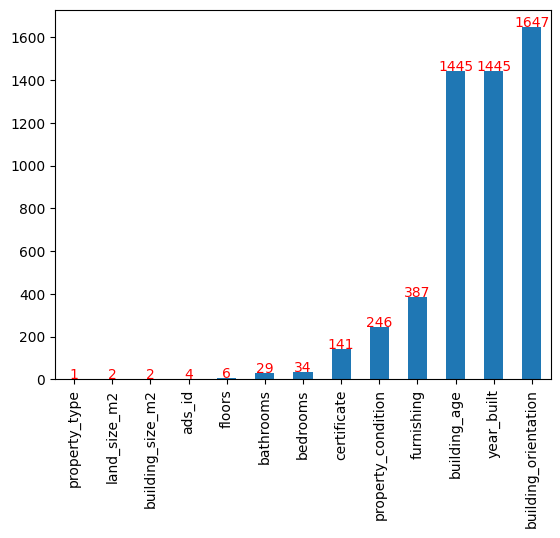

In [487]:
# cek missing value
missing = data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
for index, value in enumerate(missing):
    if value > 0:
        plt.text(x=index,y=value + 1,s=str(value),ha='center',fontsize=10,color='red')

### Cek Data Duplikat dan Drop Data Duplikat

In [488]:
# cek data duplikat
sum_duplicated = data.duplicated(subset = ['title', 'address', 'district','price_in_rp','electricity', 'bedrooms', 'bathrooms','floors','year_built']).sum()
print(f"Terdapat {sum_duplicated} record duplikat berdasarkan 'title', 'address', 'district','price_in_rp','electricity', 'bedrooms', 'bathrooms','floors','year_built'")

Terdapat 115 record duplikat berdasarkan 'title', 'address', 'district','price_in_rp','electricity', 'bedrooms', 'bathrooms','floors','year_built'


In [489]:
# Data duplikat
is_duplicated = data.duplicated(subset = ['title', 'address', 'district','price_in_rp','electricity', 'bedrooms', 'bathrooms','floors','year_built'],keep = False)
data_duplikat = data.loc[is_duplicated]
data_duplikat.head(4)

,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,...,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
99,https://www.rumah123.com/properti/bekasi/hos11...,2.150000e+09,Di Jual Rumah Siap Huni di Cluster Asera Harap...,"Harapan Indah, Bekasi",Harapan Indah,Bekasi,-6.181752,106.973684,AC,rumah,...,2200 mah,1,1,2.0,NaN,NaN,NaN,NaN,0,NaN
100,https://www.rumah123.com/properti/bekasi/hos11...,2.150000e+09,Di Jual Rumah Siap Huni di Cluster Asera Harap...,"Harapan Indah, Bekasi",Harapan Indah,Bekasi,-6.181752,106.973684,AC,rumah,...,2200 mah,1,1,2.0,NaN,NaN,NaN,NaN,0,NaN
127,https://www.rumah123.com/properti/bekasi/hos11...,5.200000e+08,Rumah Harga Terjangkau Perumahan Taman Harapan...,"Harapan Indah, Bekasi",Harapan Indah,Bekasi,-6.181752,106.973684,"Akses Parkir, One Gate System, Masjid, Keama...",rumah,...,1300 mah,0,0,1.0,NaN,NaN,butuh renovasi,selatan,0,unfurnished
128,https://www.rumah123.com/properti/bekasi/hos11...,5.200000e+08,Rumah Harga Terjangkau Perumahan Taman Harapan...,"Harapan Indah, Bekasi",Harapan Indah,Bekasi,-6.181752,106.973684,"Akses Parkir, One Gate System, Masjid, Keama...",rumah,...,1300 mah,0,0,1.0,NaN,NaN,butuh renovasi,selatan,0,unfurnished


In [490]:
# drop data duplikat
data.drop_duplicates(subset = ['title', 'address', 'district','price_in_rp','electricity', 'bedrooms', 'bathrooms','floors','year_built'], inplace=True)

In [491]:
# cek data duplikat berdasarkan ads id
sum_duplicated = data.duplicated(subset = ['ads_id']).sum()
print(f"Terdapat {sum_duplicated} record duplikat berdasarkan ads_di")

Terdapat 3 record duplikat berdasarkan ads_di


In [492]:
data.drop_duplicates(subset = ['ads_id'], inplace=True)

### Ganti Record yang Terkukar Nilainya

In [493]:
#Helper Fuction
def hist_plot(df,col):
  num_features = len(col)
  fig, axes = plt.subplots(1, num_features, figsize=(5 * num_features, 5))
  for i, feature in enumerate(col):
      sns.histplot(df[feature], bins=10,ax=axes[i])
      axes[i].set_title(f'Histogram {feature}')
      axes[i].set_xlabel(feature)
      axes[i].set_ylabel('Frekuensi')
      axes[i].tick_params(axis='x', rotation=90)
  # Menampilkan plot
  plt.tight_layout()
  plt.show()

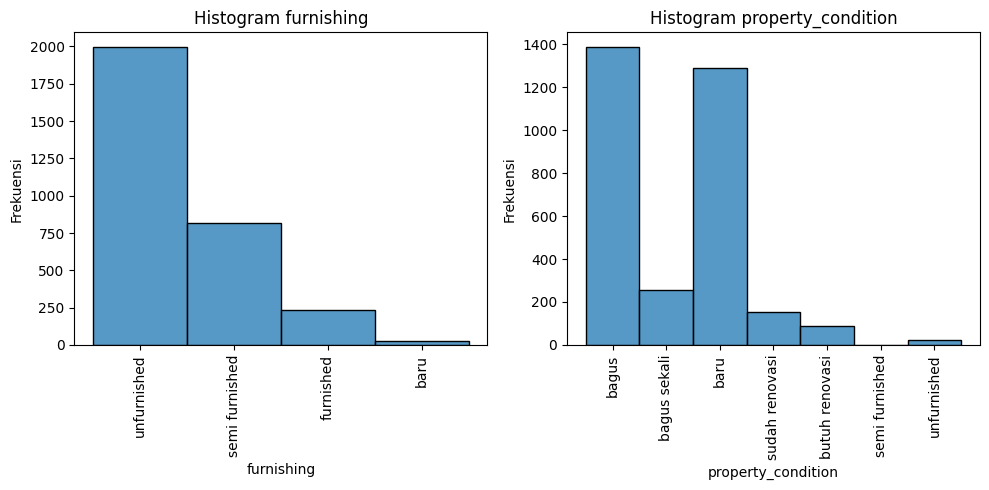

In [494]:
# Lihat nilai uniqe untuk feature furnising dan prperty condition
hist_plot(data, ['furnishing', 'property_condition'])

In [495]:
# menukar record data fitur property_condition dan furnishing yang terbalik
mask = data['furnishing'] == 'baru'
temp = data.loc[mask, 'property_condition'].copy()
data.loc[mask, 'property_condition'] = data.loc[mask, 'furnishing']
data.loc[mask, 'furnishing'] = temp

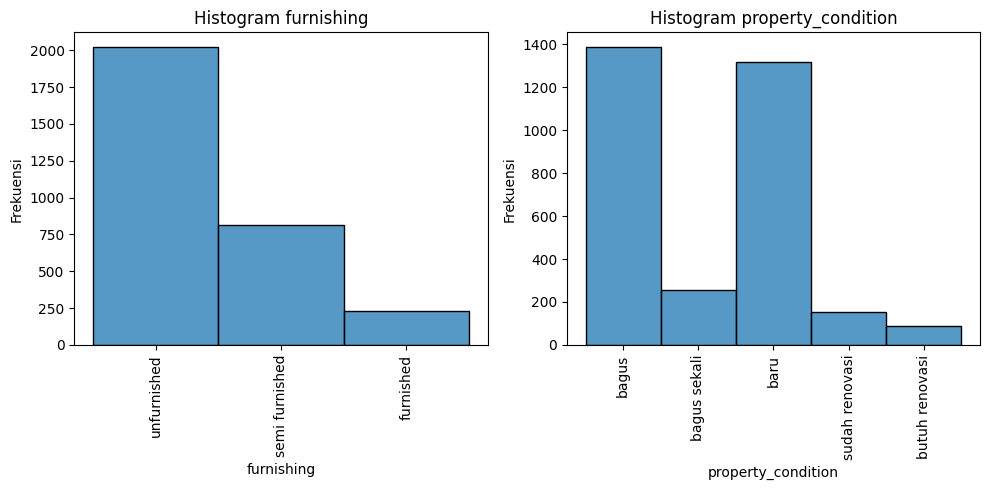

In [496]:
# Feature furnishing dan property_condition setelah ditukar
hist_plot(data, ['furnishing', 'property_condition'])

### Ubah Tipe Data

In [497]:
# mengubah tipe data dari feature electricity
data['electricity'] = data['electricity'].str.slice(stop=-4)
data['electricity'] = data['electricity'].replace('lainnya', np.nan)
data['electricity'] = pd.to_numeric(data['electricity'])

unique_values = data['electricity'].unique()
print(f"Fitur 'electricity': {unique_values}")

Fitur 'electricity': [ 4400.  2200.  3500.  1300.    nan  5500.  6600.  7700.  3300.  7600.
 10600.   900. 47500. 11000.  8000.   450. 10000. 53000. 16500. 13200.
 13900. 17600. 23000. 41500. 12700. 13300. 33000. 24000. 22000.  9500.]


In [498]:
# ganti tipe sertifikat
data.loc[data['certificate'] == 'hp - hak pakai', 'certificate'] = 'lainnya (ppjb,girik,adat,dll)'
data.loc[data['certificate'] == 'lainnya (ppjb,girik,adat,dll)', 'certificate'] = 'lainnya'

In [499]:
#handle missing value atribut floors dgn nilai 1
data['floors'] = data['floors'].fillna(1)
#mengganti tipe data floors
data['floors'] = data['floors'].astype(int)

### Unique Value each Feature

In [500]:
cols = data.columns.to_list()

In [501]:
# Unique Value Counts In Each Column
set_frame_style(data[cols].nunique().to_frame().rename({0:'Unique Value Count'}, axis=1), 'Unique Value Counts In Each Column')

,Unique Value Count
url,3435
price_in_rp,660
title,3341
address,397
district,380
city,9
lat,389
long,390
facilities,2004
property_type,1


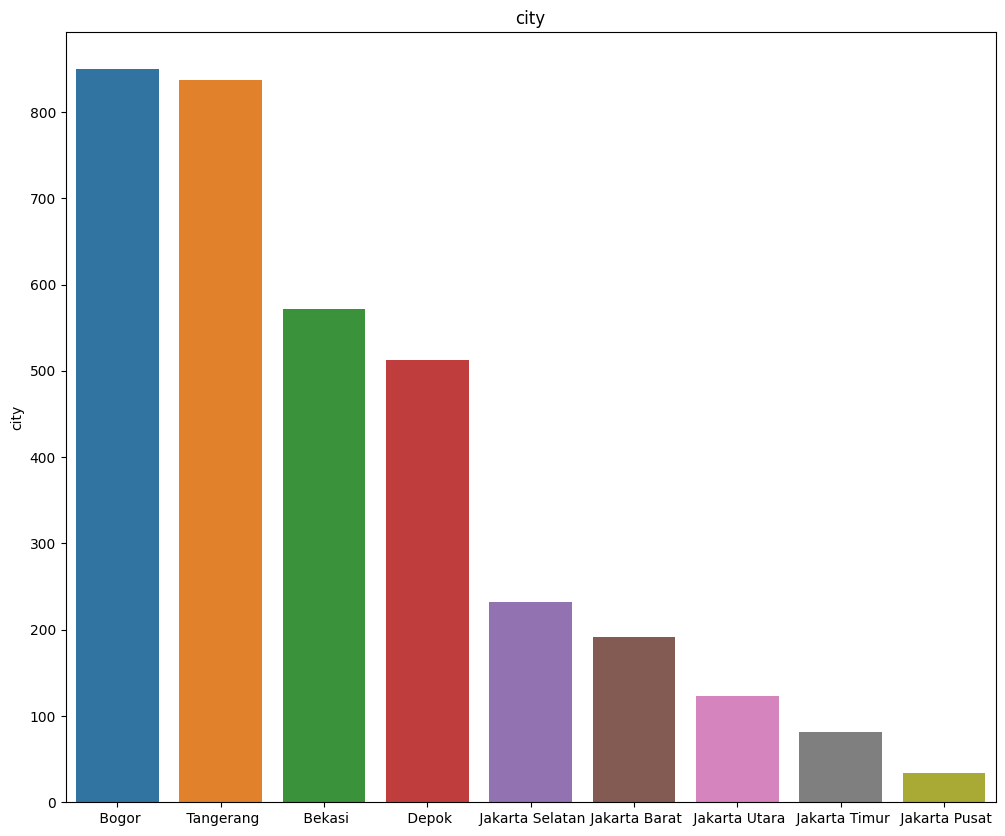

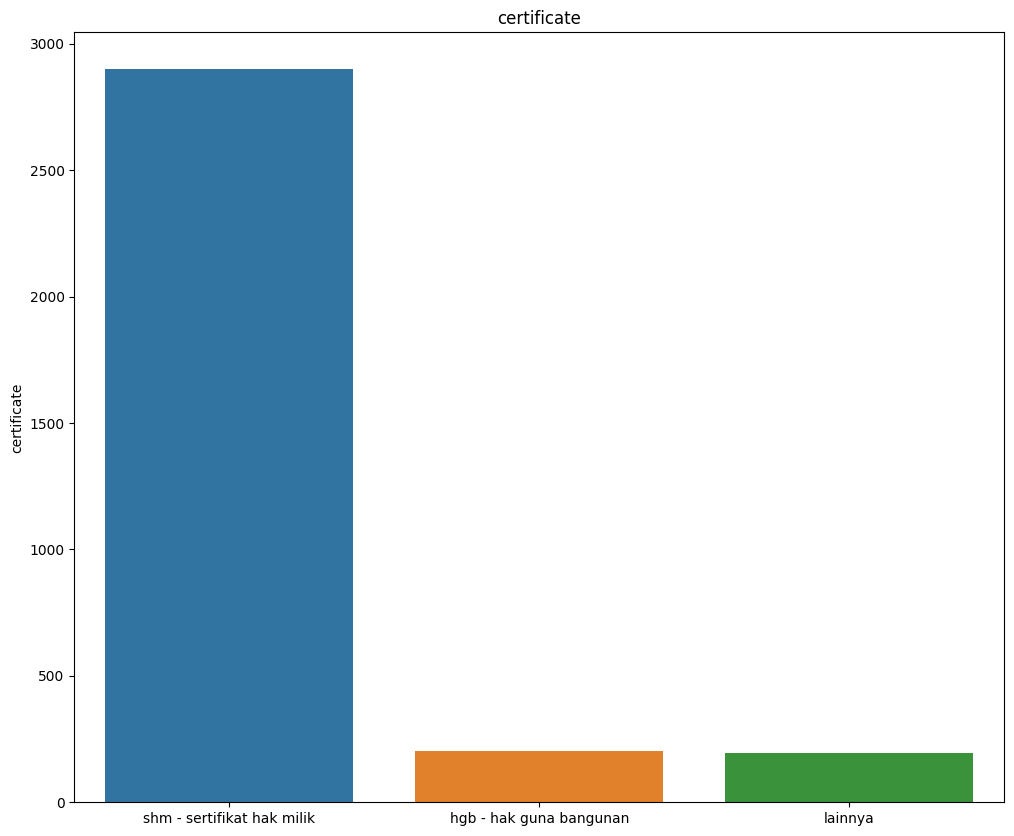

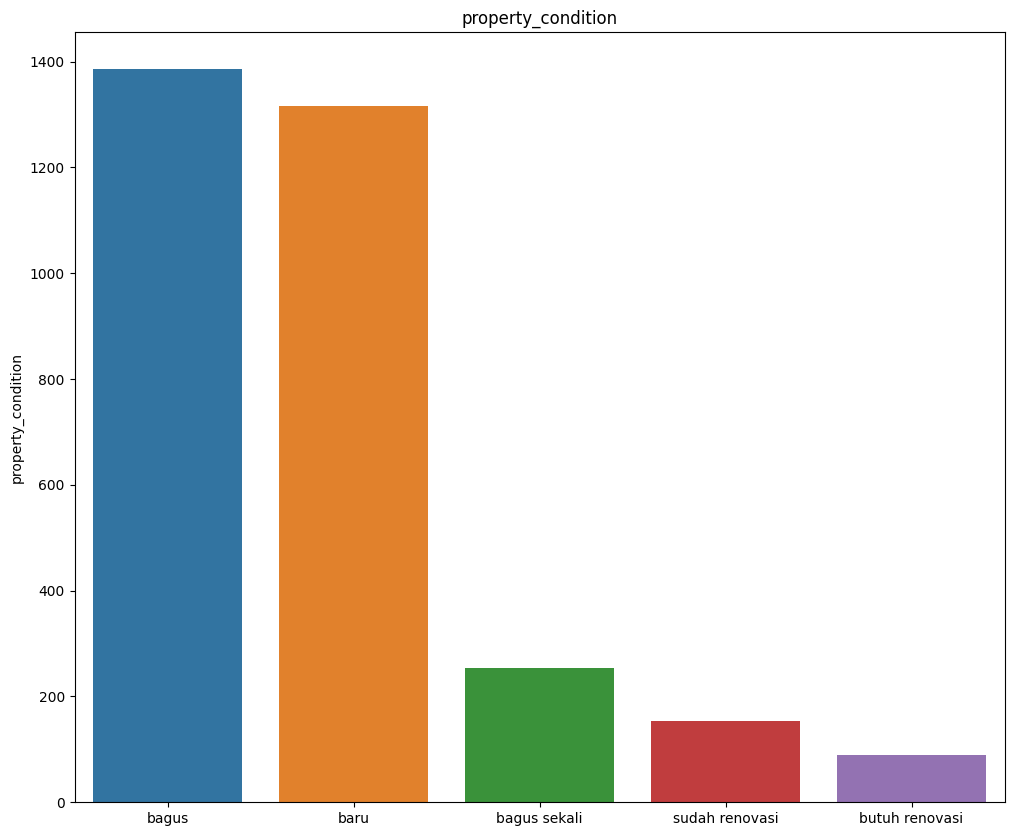

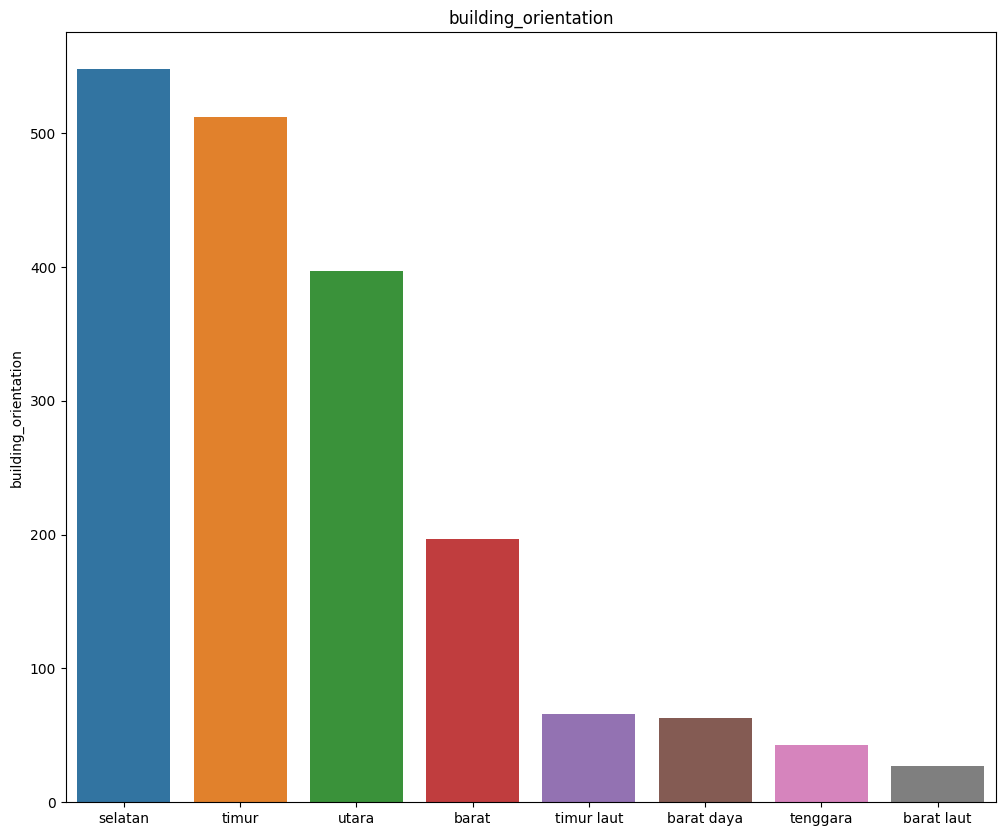

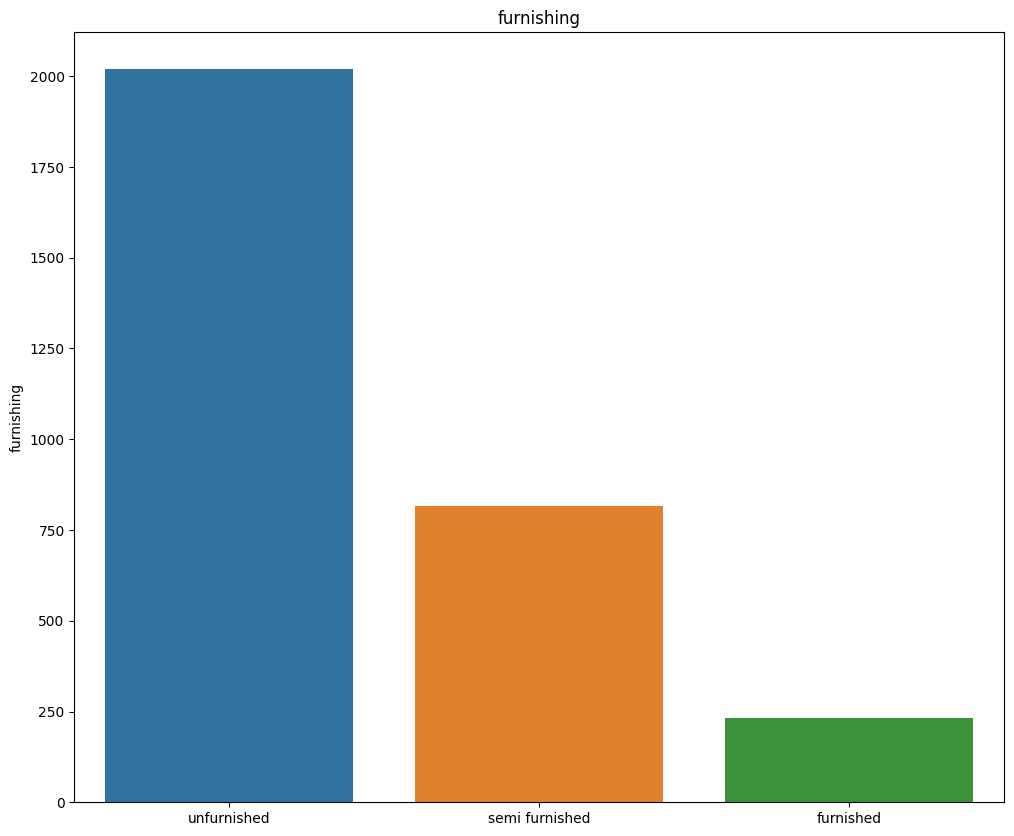

In [502]:
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
data_cat = data[cat_cols]
for i in data_cat.columns:
    if i == "url" or i == "title" or i == "address" or i == "district" or i =="facilities" or i == "property_type" or i =="ads_id" or i == "electricity":
        continue
    plt.figure(figsize=(12,10))
    sns.barplot(x=data_cat[i].value_counts().index, y=data_cat[i].value_counts()).set_title(i)
    plt.show()

### Drop High Cardinality Feature

In [503]:
# drop kolom 'url', 'title' , 'property_type', 'address','lat','long','ads_id', facilities'
list_to_drop = ['url', 'property_type', 'address','ads_id','lat','long','facilities']
data.drop(list_to_drop, axis=1, inplace = True )

Drop kolom yang memilik nilai unik yang banyak (high cardinality) dan yang hanya memiliki 1 nilai unik

## Handling Missing Value

* Drop feature with missing value > 1/3 of total record

* Numeric missing value handle with KNNImputer

* Categorical missing value handle with mode


### 1/3 Missing Value Feature

In [504]:
# drop kolom 'building_age', 'year_built', 'building_orientation'
# missing value 3 kolom tersebut lebih dari 1/3 record
list_to_drop = ['building_age', 'year_built', 'building_orientation']
data.drop(list_to_drop, axis=1, inplace = True )

### Numeric Missing Value

In [505]:
#Menyimpan kolom numerik dan kategorik
num_cols = data.select_dtypes(exclude=['object']).columns.tolist()
cat_cols = data.select_dtypes(include=['object']).columns.tolist()

In [506]:
def knnimputer_handling_missing_value(df):
  #Inisiasi KNNImputer
  imputer = KNNImputer(n_neighbors=3)

  # nilai missing pd feature numerik akan dihandle dengan knn imputer
  data_numerik = data[num_cols]
  data_numerik_imputed = pd.DataFrame(imputer.fit_transform(data_numerik), columns=data_numerik.columns)
  data_numerik_imputed['ID'] = np.arange(1, len(data_numerik_imputed) + 1)

  #menambahkan kolom id
  df['ID'] = np.arange(1, len(df) + 1)

  # drop feature numerik pada data
  df.drop(num_cols, axis=1, inplace = True )

  # menggabungkan dataset
  df = pd.merge(df, data_numerik_imputed, on='ID')
  df.drop('ID',axis=1, inplace = True )

  return df

In [507]:
data = knnimputer_handling_missing_value(data)

In [508]:
# ubah feature numerik menjadi tipe integer
def to_int(df, num_cols):
  for num_feature in num_cols:
    df[num_feature] = df[num_feature].astype(int)
  return df

In [509]:
data = to_int(data,num_cols)

In [510]:
def plot_missing_value(data):
  missing = data.isnull().sum()
  missing = missing[missing > 0]
  missing.sort_values(inplace=True)
  missing.plot.bar()
  for index, value in enumerate(missing):
      if value > 0:
          plt.text(x=index,y=value + 1,s=str(value),ha='center',fontsize=10,color='red')

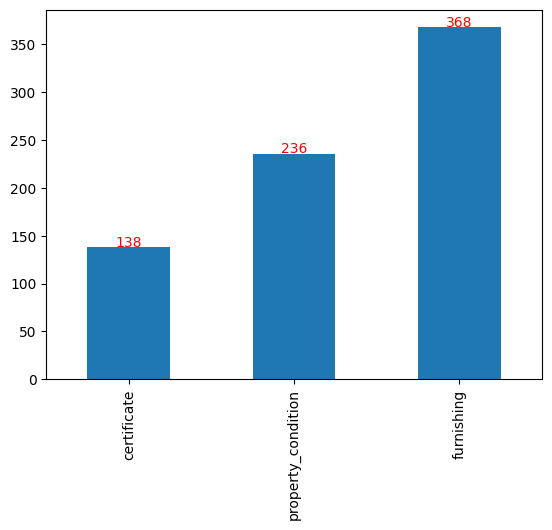

In [511]:
plot_missing_value(data)

### Categoric Missing Value

In [512]:
#Handling Categoric Missing Value w/ the most frequent data
def handling_cat_missing_value(data, cat_feature):
  # replace missing values with the mode
  data[cat_feature] = data[cat_feature].fillna(data[cat_feature].mode().iloc[0])
  return data

In [513]:
data = handling_cat_missing_value(data, 'furnishing')
data = handling_cat_missing_value(data, 'certificate')
data = handling_cat_missing_value(data, 'property_condition')

## EDA
yang harus ada :
* Insight dari data

> anomali pake scatter plot dan uji  handle pake Z-Score atau  IQR (Interquartile Range),

> pola,

> asumsi awal ex : feature yg paling berpengaruh pake korelasi dgn harga)

* Penjelasan Deskripsi Statistik

* Visualisasi Variabel dan Visualiasi Penyebaran Data

### Data Insight
* anomali
* pola

#### Pola/Tren Harga Rumah

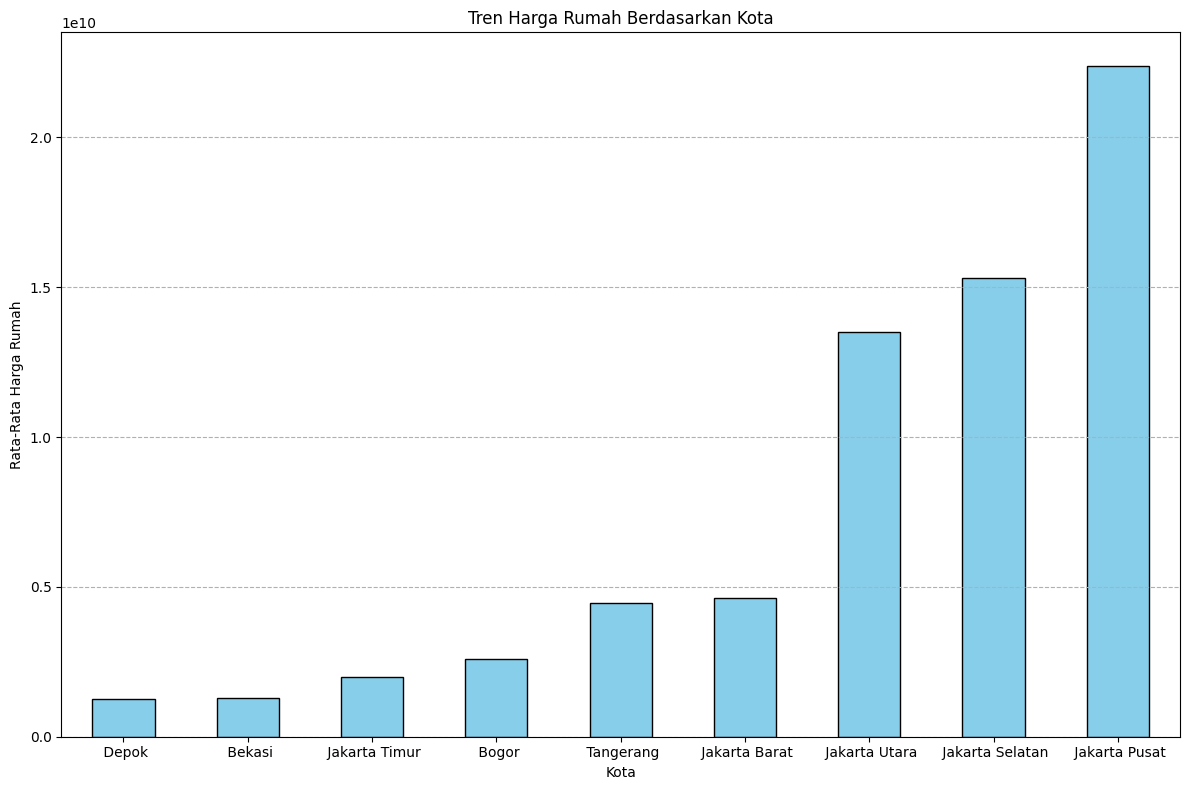

In [514]:
mean_prices_by_city = data.groupby('city')['price_in_rp'].mean().sort_values()

plot(mean_prices_by_city, 'Tren Harga Rumah Berdasarkan Kota', 'Kota','Rata-Rata Harga Rumah')

Jika dilihat berdasarkan lokasi, tren harga rumah cenderung meningkat semakin dekat dengan pusat kota

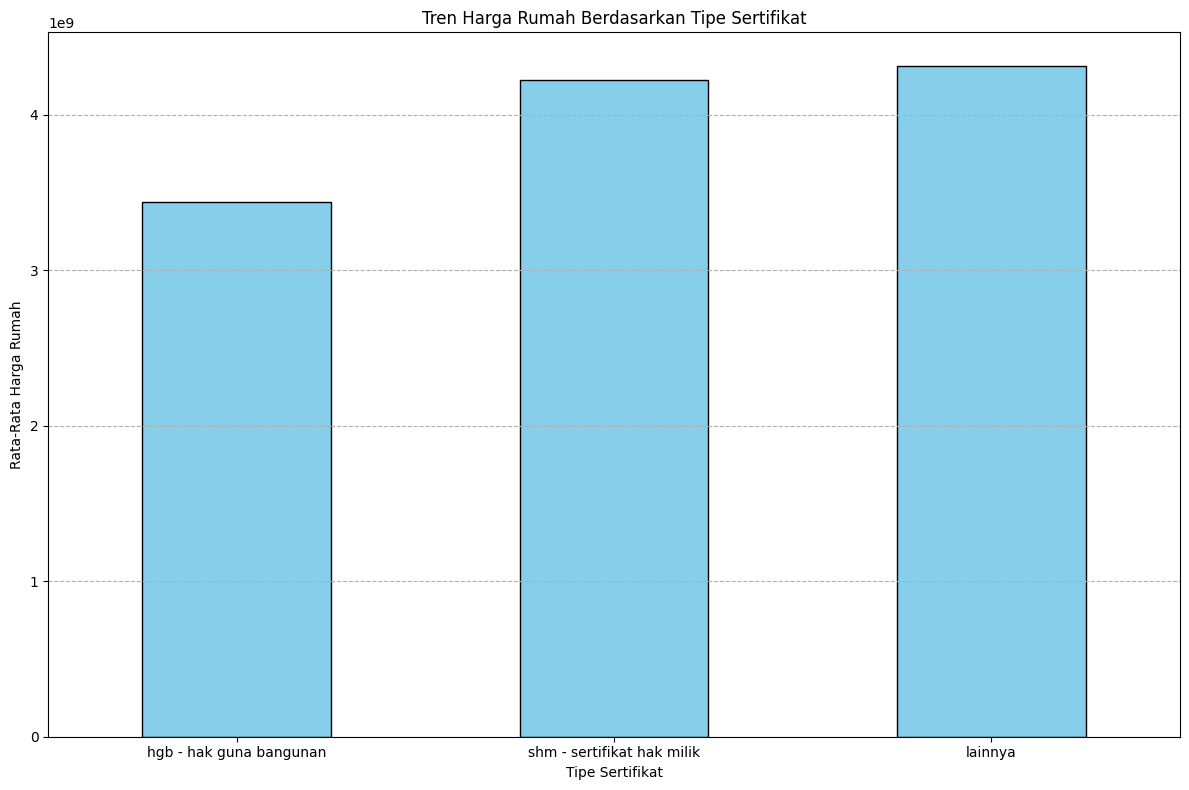

In [515]:
mean_prices_by_certificate = data.groupby('certificate')['price_in_rp'].mean().sort_values()

plot(mean_prices_by_certificate, 'Tren Harga Rumah Berdasarkan Tipe Sertifikat', 'Tipe Sertifikat','Rata-Rata Harga Rumah')

Harga rumah dengan sertifikat SHM(Sertifikat Hak Milik) meniliki harga jual yang lebih mahal dibanding dengan rumah bersertifikat HGB(Hak Guna Bangunan)

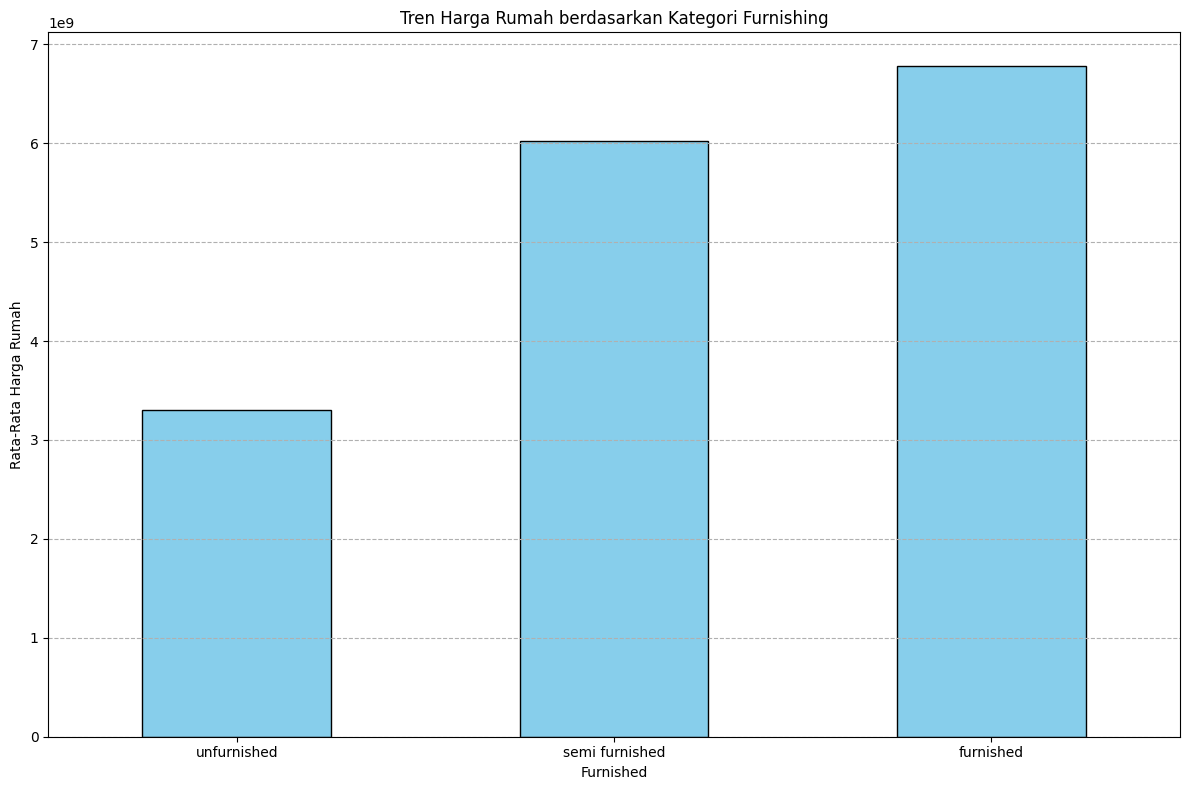

In [516]:
mean_prices_by_furnishing = data.groupby('furnishing')['price_in_rp'].mean().sort_values()

plot(mean_prices_by_furnishing, 'Tren Harga Rumah berdasarkan Kategori Furnishing', 'Furnished','Rata-Rata Harga Rumah')

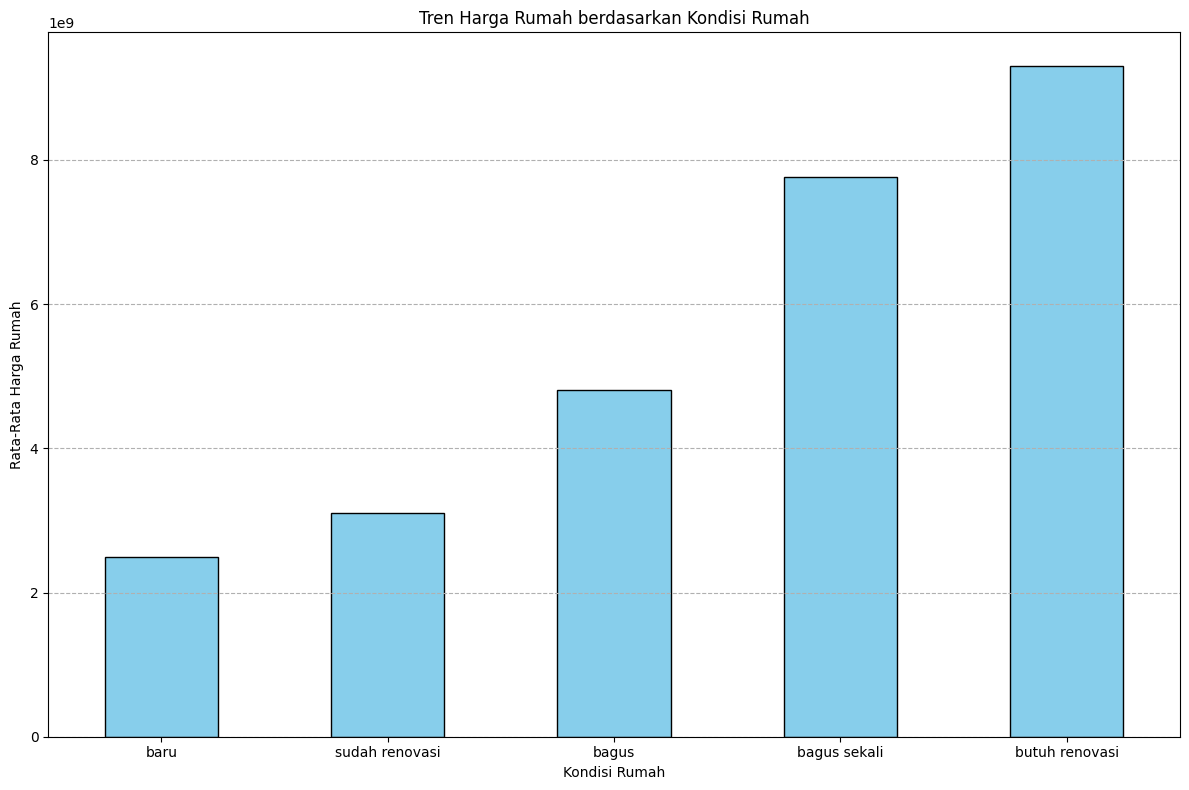

In [517]:
mean_prices_by_condition = data.groupby('property_condition')['price_in_rp'].mean().sort_values()

plot(mean_prices_by_condition, 'Tren Harga Rumah berdasarkan Kondisi Rumah', 'Kondisi Rumah','Rata-Rata Harga Rumah')

> Harga rumah yang membutuhkan renovasi cenderung lebih mahal dari pada harga rumah yang baru.

> Diasumsikan terapat anomali pada harga rumah




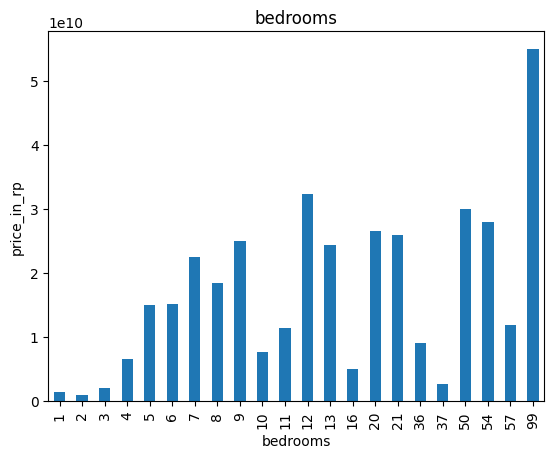

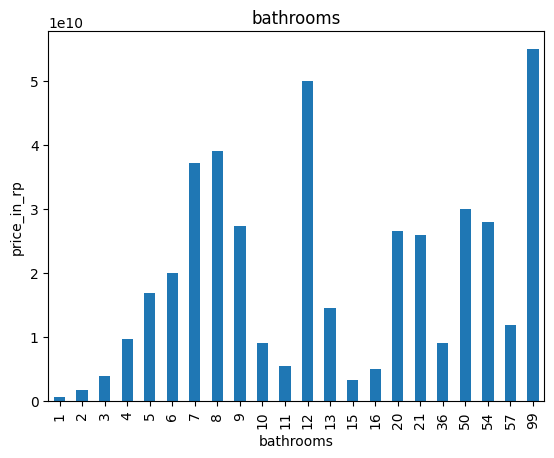

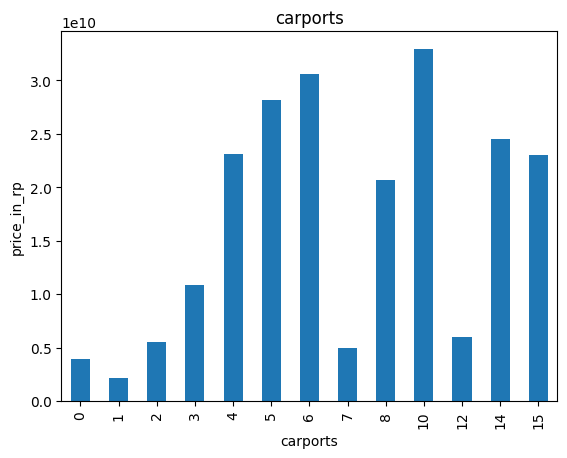

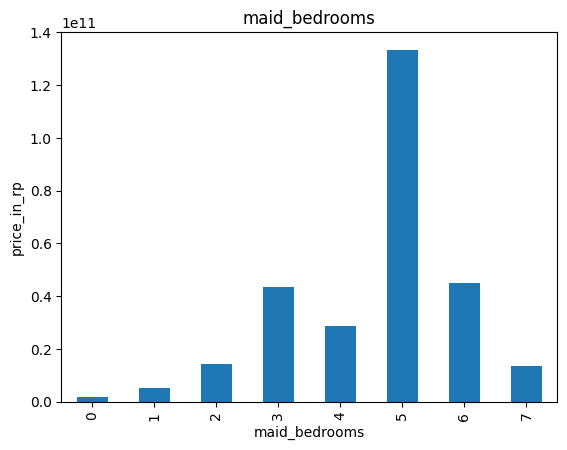

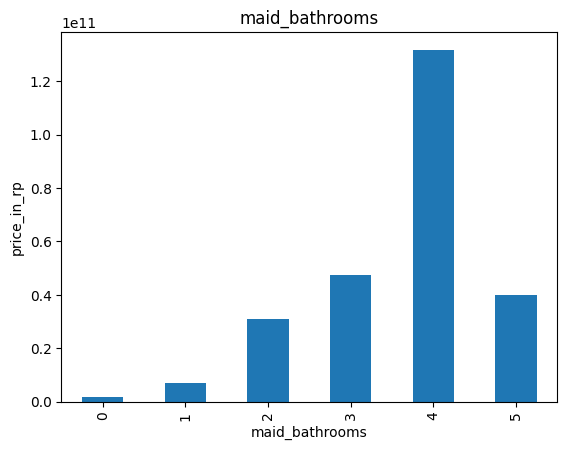

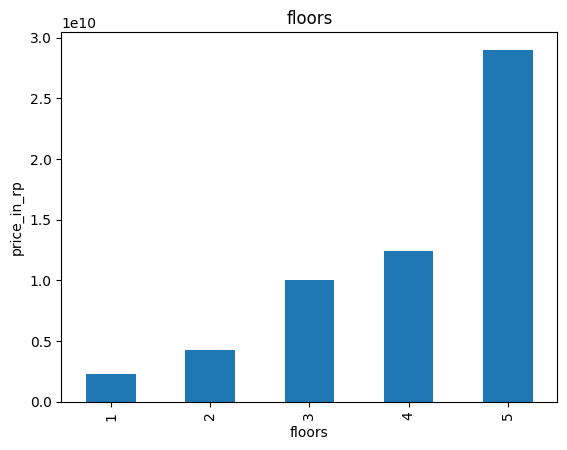

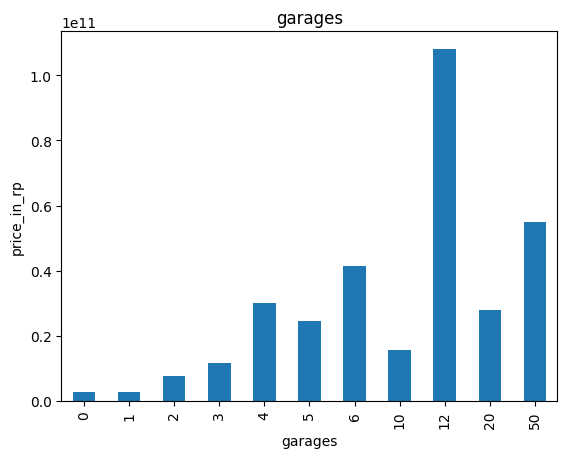

In [518]:
num_visualization_col =  num_cols
values_to_remove = ['price_in_rp', 'land_size_m2','building_size_m2','electricity']
num_visualization_col = [x for x in num_visualization_col if x not in values_to_remove]
for feature in num_visualization_col:
    data_copy =data.copy()
    data_copy.groupby(feature)['price_in_rp'].mean().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('price_in_rp')
    plt.title(feature)
    plt.show()

Insight Data :
* Feature 'bedrooms', 'bathrooms', 'maid_bedrooms', 'maid_bathrooms', 'carports', 'garages' dengan harga rumah tidak memiliki hubungan yang linear.
* Tren harga cenderung fluktuatif untuk jumlah 'bedrooms', 'bathrooms', 'maid_bedrooms', 'maid_bathrooms', 'carports', 'garages' diatas 4.

* Hubungan linear terlihat pada feature 'floors' dengan harga rumah sehingga dapat disimpulkan salah satu faktor yang memengaruhi harga rumah adalah tingkat bagunan

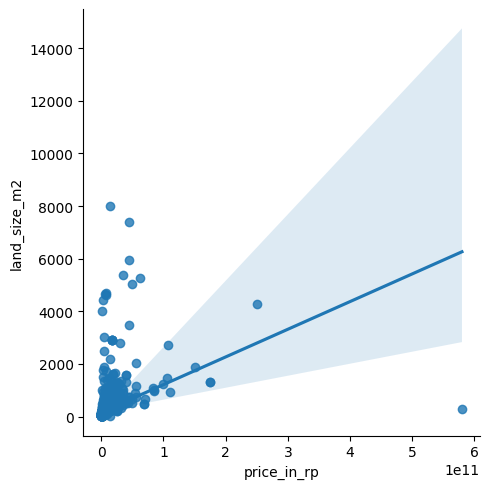

In [519]:
# Tren harga terhadap luas lahan
sns.lmplot(data, x='price_in_rp', y='land_size_m2')

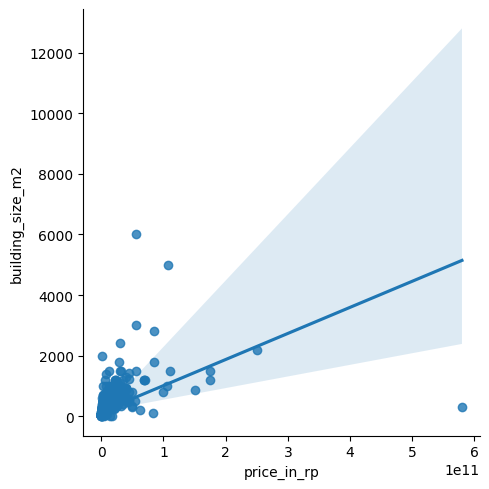

In [520]:
# Tren harga terhadap luas bangunan
sns.lmplot(data, x='price_in_rp', y='building_size_m2')

Terdapat rumah yang berharga sekitar 600 M sehingga diasumsikan terdapat anomali pada data

#### Handling Outlier data

<Figure size 1000x1500 with 0 Axes>

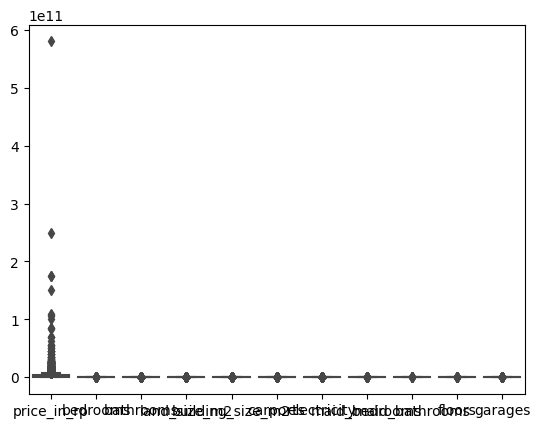

<Figure size 1000x1500 with 0 Axes>

In [521]:
sns.boxplot(data = data[num_cols])
plt.figure(figsize=(10,15))

In [522]:
#handling outlier
def winsorize_column_iqr(df, column, multiplier):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - multiplier * iqr
    upper_limit = q3 + multiplier * iqr
    df[column] = np.where(df[column] < lower_limit, lower_limit, df[column])
    df[column] = np.where(df[column] > upper_limit, upper_limit, df[column])
    return df

In [523]:
# Handling numerik oulier record
column_name = num_cols
iqr_multiplier = 1.5

for col in column_name:
  data = winsorize_column_iqr(data, col, iqr_multiplier)

In [524]:
Q1 = data['price_in_rp'].quantile(0.25)
Q3 = data['price_in_rp'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data = data[(data['price_in_rp'] >= lower_bound) & (data['price_in_rp'] <= upper_bound)]

<Figure size 1000x1500 with 0 Axes>

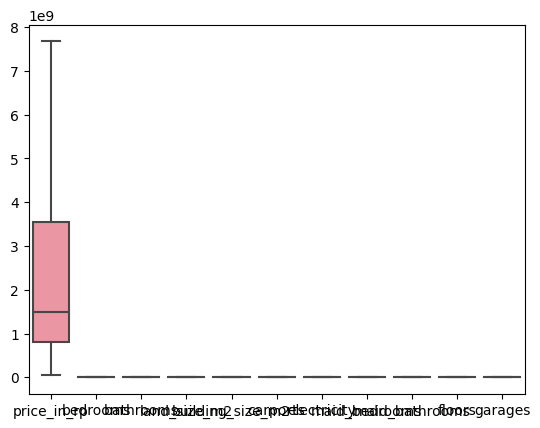

<Figure size 1000x1500 with 0 Axes>

In [525]:
sns.boxplot(data = data[num_cols])
plt.figure(figsize=(10,15))

### Deskripsi Statistik

In [526]:
cols = data.columns.to_list()

In [527]:
#Head of Data
set_frame_style(data.head(3), caption="First 3 Rows Of Data")

,title,district,city,certificate,property_condition,furnishing,price_in_rp,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,electricity,maid_bedrooms,maid_bathrooms,floors,garages
0,"Rumah cantik Sumarecon Bekasi Lingkungan asri, tenang & nyaman",Summarecon Bekasi,Bekasi,shm - sertifikat hak milik,bagus,unfurnished,2990000000.000000,4.000000,4.000000,239.000000,272.000000,0.000000,4400.000000,0.000000,1.000000,2.000000,0.000000
1,"Rumah Kekinian, Magenta Summarecon Bekasi",Summarecon Bekasi,Bekasi,hgb - hak guna bangunan,bagus,unfurnished,1270000000.000000,3.000000,2.000000,55.000000,69.000000,1.000000,2200.000000,0.000000,0.000000,2.000000,0.000000
2,Rumah Cantik 2 Lantai Cluster Bluebell Summarecon Bekasi,Summarecon Bekasi,Bekasi,hgb - hak guna bangunan,bagus,unfurnished,1950000000.000000,3.000000,3.000000,119.000000,131.000000,1.000000,2200.000000,1.000000,1.000000,2.000000,1.000000


In [528]:
#Summary Statistic
set_frame_style(data[cols].describe().T,'Summary Statistics')

,count,mean,std,min,25%,50%,75%,max
price_in_rp,3435.000000,2557529257.641922,2350573618.749396,42000000.000000,800000000.000000,1500000000.000000,3550000000.000000,7675000000.000000
bedrooms,3435.000000,3.202620,1.095734,1.000000,2.000000,3.000000,4.000000,7.000000
bathrooms,3435.000000,2.447744,1.075671,1.000000,2.000000,2.000000,3.000000,4.500000
land_size_m2,3435.000000,147.282023,97.372135,12.000000,75.000000,108.000000,187.500000,356.250000
building_size_m2,3435.000000,155.928384,116.988561,1.000000,66.000000,111.000000,200.000000,401.000000
carports,3435.000000,1.142358,0.836066,0.000000,1.000000,1.000000,2.000000,3.500000
electricity,3435.000000,2788.111790,1407.754635,450.000000,2200.000000,2200.000000,3500.000000,5450.000000
maid_bedrooms,3435.000000,0.483406,0.630947,0.000000,0.000000,0.000000,1.000000,2.500000
maid_bathrooms,3435.000000,0.365939,0.519989,0.000000,0.000000,0.000000,1.000000,2.500000
floors,3435.000000,1.760408,0.626143,1.000000,1.000000,2.000000,2.000000,3.500000


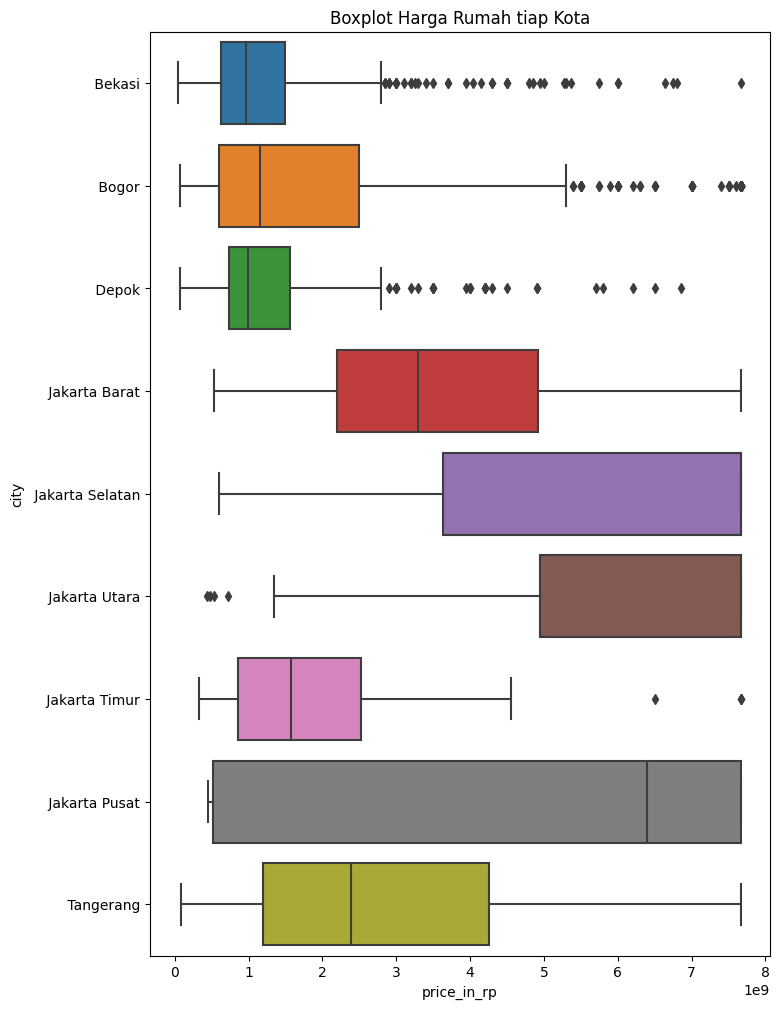

In [529]:
# boxplot evaluasi harga per city
plt.figure(figsize=(8,12))
sns.boxplot(x='price_in_rp', y='city', data = data)
plt.title('Boxplot Harga Rumah tiap Kota')
plt.show()

Terdapat rumah dengan harga mendekati 600 Miliar Rupiah yang berlokasi di daerah Tangerang, dapat diasumsikan adanya anomali

### Visualiasi Penyebaran Data


count    3.435000e+03
mean     2.557529e+09
std      2.350574e+09
min      4.200000e+07
25%      8.000000e+08
50%      1.500000e+09
75%      3.550000e+09
max      7.675000e+09
Name: price_in_rp, dtype: float64


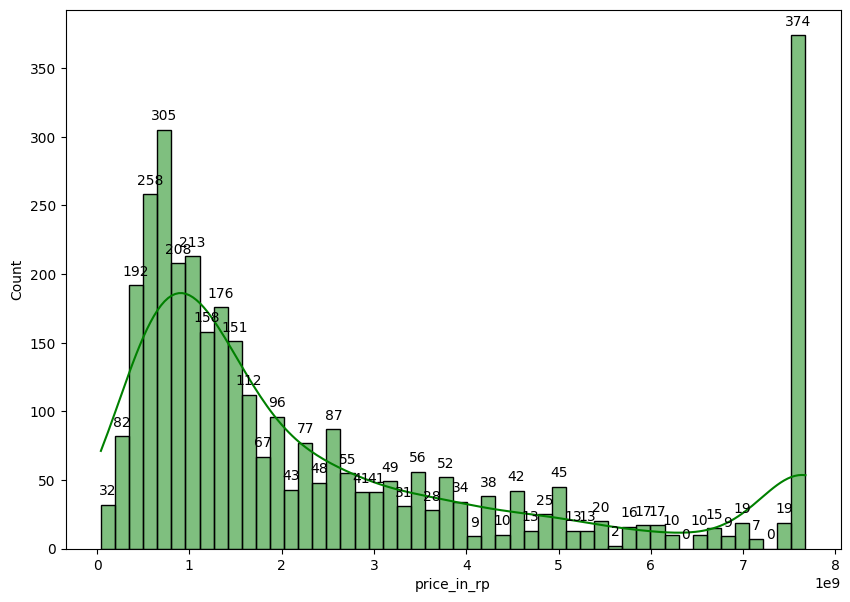

In [530]:
print(data['price_in_rp'].describe())
plt.figure(figsize=(10,7))
ax = sns.histplot(data['price_in_rp'], bins=50, color="g", kde=True)

# Menampilkan banyaknya record untuk setiap kategori harga
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()

Skewness untuk kolom numerik:
price_in_rp         1.179905
bedrooms            0.999602
bathrooms           0.243485
land_size_m2        1.127313
building_size_m2    1.023955
carports            0.603236
electricity         0.797277
maid_bedrooms       1.041636
maid_bathrooms      0.999663
floors              0.276670
garages             0.820830
dtype: float64


<ipython-input-531-be8caeb4aa04>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


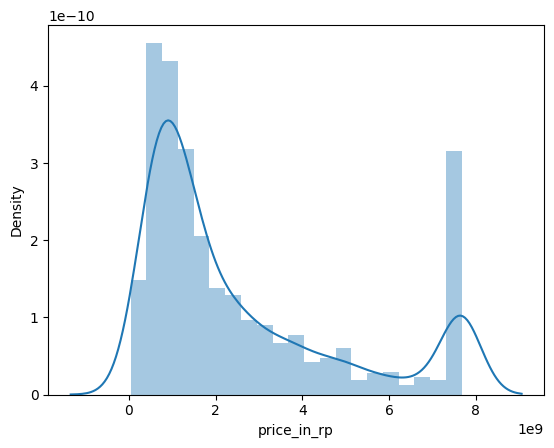

<ipython-input-531-be8caeb4aa04>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


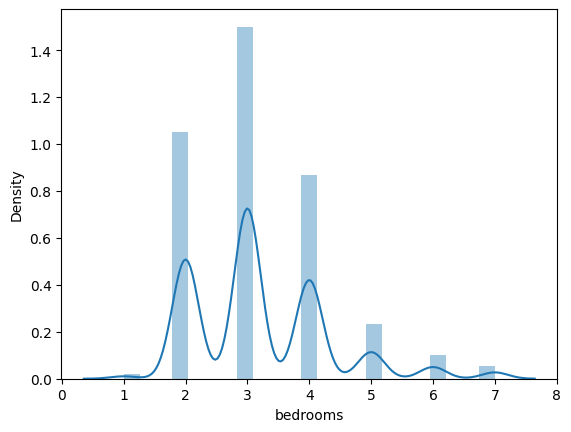

<ipython-input-531-be8caeb4aa04>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


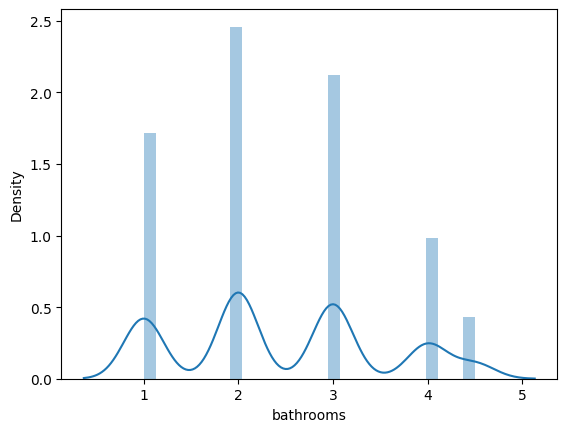

<ipython-input-531-be8caeb4aa04>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


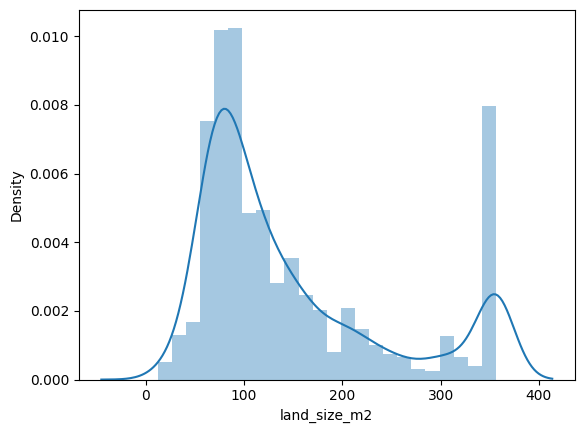

<ipython-input-531-be8caeb4aa04>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


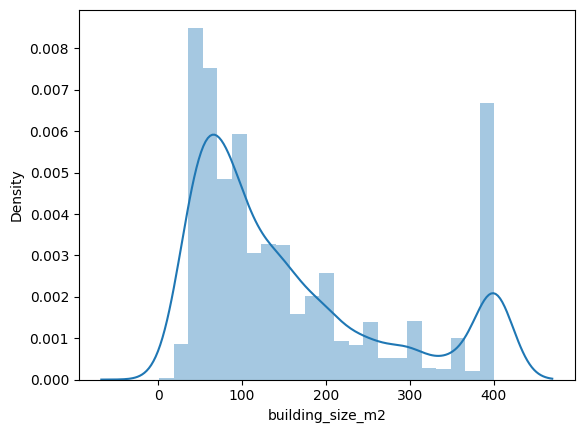

<ipython-input-531-be8caeb4aa04>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


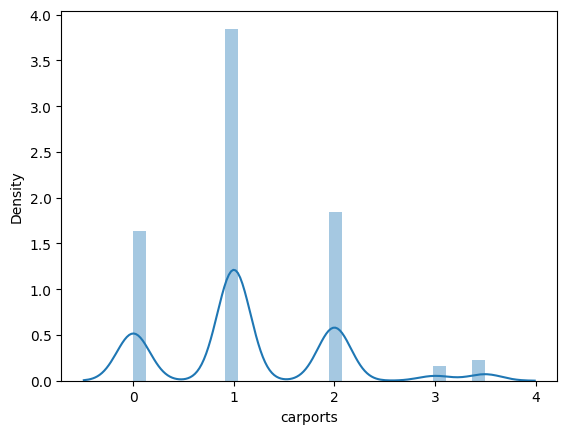

<ipython-input-531-be8caeb4aa04>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


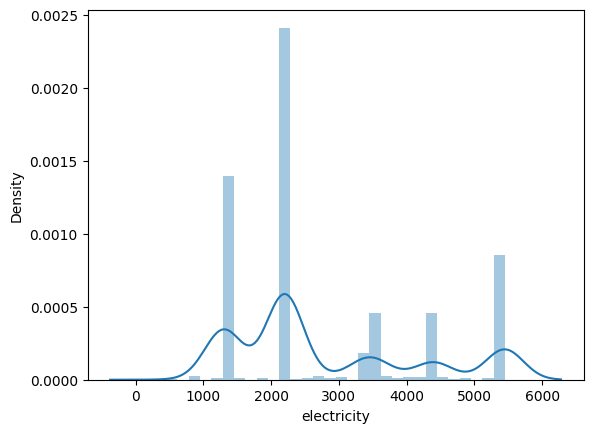

<ipython-input-531-be8caeb4aa04>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


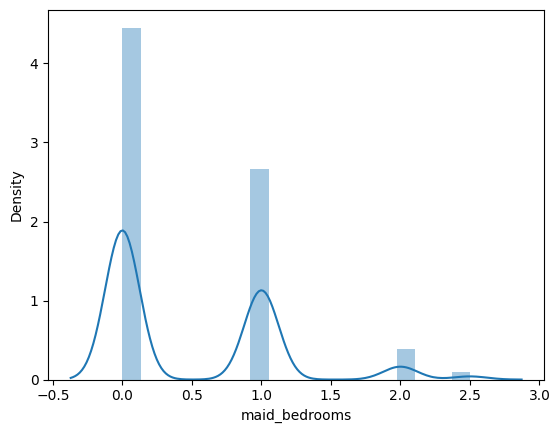

<ipython-input-531-be8caeb4aa04>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


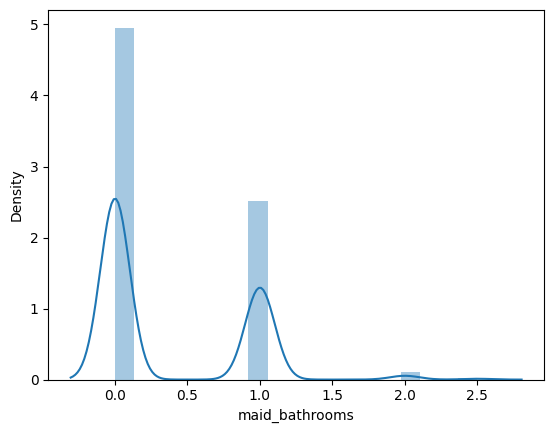

<ipython-input-531-be8caeb4aa04>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


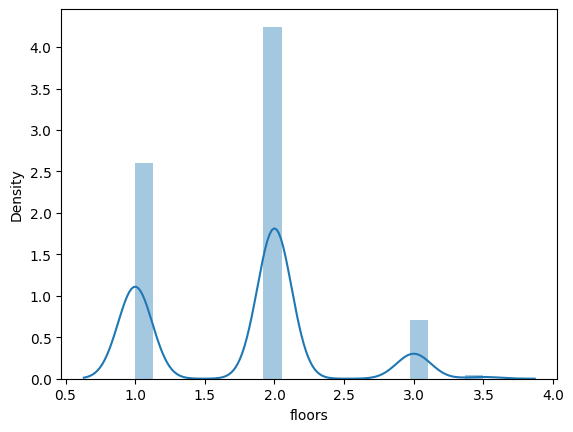

<ipython-input-531-be8caeb4aa04>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])


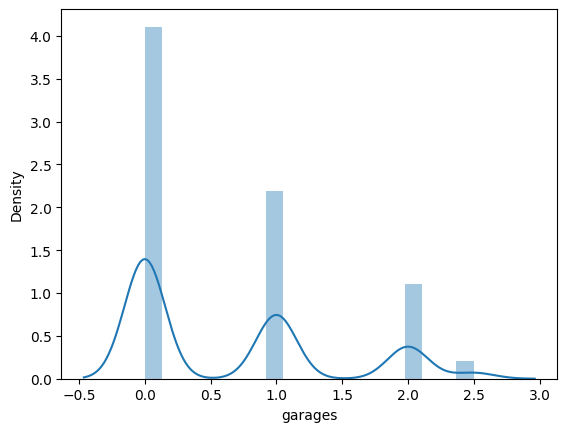

In [531]:
# Menghitung skewness untuk kolom numerik
skewness_numerik = data[num_cols].apply(skew)

# Menampilkan skewness untuk kolom numerik
print("Skewness untuk kolom numerik:")
print(skewness_numerik)

for col in num_cols:
  #plot skewness
  plt.figure()
  sns.distplot(data[col])
  plt.show()

Dari 11 Feature-Featrue numerik tersebut 5 (price_in_rp, land_size_m2 , building_size_m2, maid_bedrooms, bedrooms) diantaranya terdistribusi tidak merata / tidak normal. Oleh karena itu, diperlukan penanganan lebih lanjut

####  Handling Skewness Numeric Feature

In [532]:
# Handling skewness
data['bedrooms'] = np.sqrt(data['bedrooms'])
data['maid_bedrooms'] = np.sqrt(data['maid_bedrooms'])
# data['price_in_rp'] = np.sqrt(data['price_in_rp'])
data['land_size_m2'] = np.sqrt(data['land_size_m2'])
data['building_size_m2'] = np.sqrt(data['building_size_m2'])

### Correlation Feature Reduction



#### Korelasi antar feature

In [533]:
# Korelasi setiap fitur tanpa fitur target
feature = data.drop('price_in_rp', axis=1)
correlation_matrix = feature.corr()

<ipython-input-533-0badb8d3ebb6>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = feature.corr()


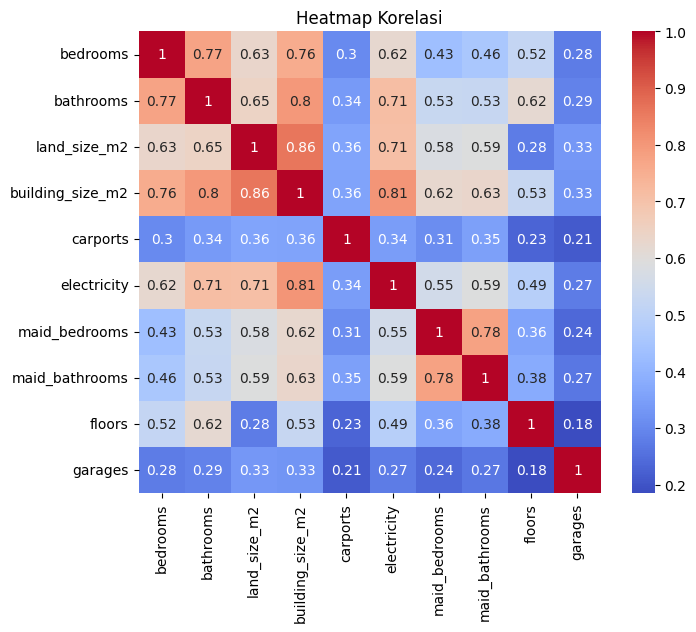

In [534]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',  square=True)
plt.title('Heatmap Korelasi')
plt.show()

In [535]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3435 entries, 0 to 3434
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               3435 non-null   object 
 1   district            3435 non-null   object 
 2   city                3435 non-null   object 
 3   certificate         3435 non-null   object 
 4   property_condition  3435 non-null   object 
 5   furnishing          3435 non-null   object 
 6   price_in_rp         3435 non-null   float64
 7   bedrooms            3435 non-null   float64
 8   bathrooms           3435 non-null   float64
 9   land_size_m2        3435 non-null   float64
 10  building_size_m2    3435 non-null   float64
 11  carports            3435 non-null   float64
 12  electricity         3435 non-null   float64
 13  maid_bedrooms       3435 non-null   float64
 14  maid_bathrooms      3435 non-null   float64
 15  floors              3435 non-null   float64
 16  garage

In [ ]:
# drop salah satu feature bedrooms atau bathrooms karena memiliki nilai korealasi > 0.9

In [536]:

data.drop('bathrooms',axis=1, inplace =True)

#### Korelasi feature dengan target

In [537]:
X = data.drop('price_in_rp',axis=1)
y = data['price_in_rp']

<ipython-input-538-be83c7a03a0a>:2: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = X.corrwith(y)


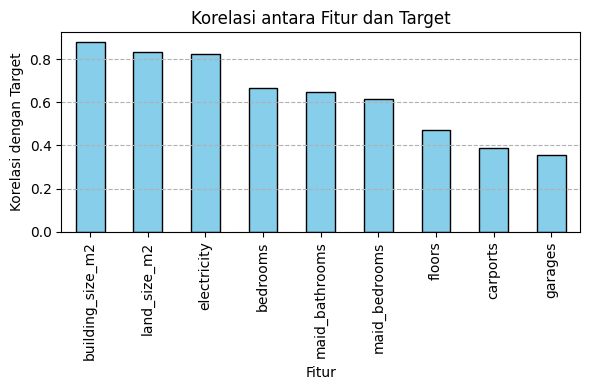

In [538]:
# Hitung korelasi antara fitur-fitur dan target
correlation = X.corrwith(y)

# Urutkan berdasarkan nilai absolut korelasi
sorted_correlation = correlation.abs().sort_values(ascending=False)

# Visualisasi hasil korelasi dengan bar plot
plt.figure(figsize=(6,4))
sorted_correlation.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Fitur')
plt.ylabel('Korelasi dengan Target')
plt.title('Korelasi antara Fitur dan Target')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [539]:
# Pilih fitur-fitur yang penting aja
# korelasi dengan harga rumah > 0.6
selected_columns = ['price_in_rp','district', 'city','building_size_m2','certificate', 'property_condition', 'land_size_m2','electricity', 'bedrooms']
data = data[selected_columns]

In [540]:
data['district'].unique()

array(['Summarecon Bekasi', 'Bekasi', 'Setu', 'Harapan Indah',
       'Bekasi Kota', 'Cibitung', 'Cibubur', 'Mustikajaya',
       'Jatisampurna', 'Jatiwarna', 'Pondok Gede', 'Jaka Setia',
       'Jati Asih', 'Grand Wisata', 'Jatibening', 'Bekasi Utara',
       'Rawalumbu', 'Tambun Selatan', 'Harapan Baru', 'Pondokmelati',
       'Babelan', 'Kemang Pratama', 'Jatiraden', 'Bekasi Timur',
       'Jatiwaringin', 'Tarumajaya', 'Cikarang Selatan', 'Kebalen',
       'Kayuringin Jaya', 'Bintara', 'Jatirangga', 'Cikarang',
       'Jati Mekar', 'Duta Harapan', 'Jati Sari', 'Pejuang', 'Galaxy',
       'Tanah Tinggi', 'Jaka Sampurna', 'Bekasi Barat', 'Tambun Utara',
       'Kaliabang', 'Mustikasari', 'Cimuning', 'Caman', 'Cikunir',
       'Satriajaya', 'Pondok Ungu', 'Pekayon', 'Harapan Mulya',
       'Harapan Jaya', 'Perwira', 'Jatikramat', 'Jatimurni', 'Jatimelati',
       'Karang Satria', 'Kranji', 'Margahayu', 'Serang Baru',
       'Duren Jaya', 'Jati Luhur', 'Jababeka', 'Komsen', 'Jatiranggon

In [541]:
data['city'].value_counts()

 Bogor              850
 Tangerang          837
 Bekasi             572
 Depok              513
 Jakarta Selatan    232
 Jakarta Barat      192
 Jakarta Utara      123
 Jakarta Timur       82
 Jakarta Pusat       34
Name: city, dtype: int64

In [542]:
data['certificate'].value_counts()

shm - sertifikat hak milik    3038
hgb - hak guna bangunan        203
lainnya                        194
Name: certificate, dtype: int64

In [543]:
data['property_condition'].value_counts()

bagus             1622
baru              1316
bagus sekali       254
sudah renovasi     153
butuh renovasi      90
Name: property_condition, dtype: int64

### Ordinal Encoding

In [544]:
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
data[cat_cols] = encoder.fit_transform(data[cat_cols])

<ipython-input-544-129c3c605b4b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cat_cols] = encoder.fit_transform(data[cat_cols])


In [545]:
data['city'].value_counts()

1.0    850
8.0    837
0.0    572
2.0    513
5.0    232
3.0    192
7.0    123
6.0     82
4.0     34
Name: city, dtype: int64

In [546]:
data['certificate'].value_counts()

2.0    3038
0.0     203
1.0     194
Name: certificate, dtype: int64

In [547]:
data['property_condition'].value_counts()

0.0    1622
2.0    1316
1.0     254
4.0     153
3.0      90
Name: property_condition, dtype: int64

### Oversampling

In [548]:
cat_cols = data.select_dtypes(include=['object']).columns.tolist()
num_cols = data.select_dtypes(exclude=['object']).columns.tolist()
data_cat = data[cat_cols]
for i in data_cat.columns:
    if i == "url" or i == "title" or i == "address" or i == "district" or i =="facilities" or i == "property_type" or i =="ads_id" or i == "electricity":
        continue
    plt.figure(figsize=(12,10))
    sns.barplot(x=data_cat[i].value_counts().index, y=data_cat[i].value_counts()).set_title(i)
    plt.show()

Terlihat dari hasil visualisasi, terdapat ketidakseimbangan kelas pada tiap fitur kategorik sehingga akan dilakukan oversampling untuk menganganinya

In [549]:
data['price_in_rp'] = data['price_in_rp'].astype(int)

In [550]:
from imblearn.over_sampling import RandomOverSampler

In [551]:
X_numerik = data[num_cols]
X_kategorik = data[cat_cols]
y = data['price_in_rp']

In [552]:
# Menginisialisasi dan menerapkan SMOTE hanya pada fitur numerik
ros = RandomOverSampler()
X_numerik_resampled, y_resampled = ros.fit_resample(X_numerik, y)

In [553]:
# Menggabungkan hasil oversampling
data = pd.DataFrame(X_numerik_resampled, columns=X_numerik.columns)
data['price_in_rp'] = y_resampled

## Final Dataset Export

In [554]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204050 entries, 0 to 204049
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   price_in_rp         204050 non-null  int64  
 1   district            204050 non-null  float64
 2   city                204050 non-null  float64
 3   building_size_m2    204050 non-null  float64
 4   certificate         204050 non-null  float64
 5   property_condition  204050 non-null  float64
 6   land_size_m2        204050 non-null  float64
 7   electricity         204050 non-null  float64
 8   bedrooms            204050 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 14.0 MB


In [555]:
data['certificate'].unique()

array([2., 0., 1.])

In [556]:
data['city'].unique()

array([0., 1., 2., 3., 5., 7., 6., 4., 8.])

In [557]:
data.shape

(204050, 9)

In [558]:
data['land_size_m2'].unique()

array([15.45962483,  7.41619849, 10.90871211, 13.41640786, 18.11077028,
       11.66190379, 12.        , 14.69693846, 14.14213562, 13.89244399,
       13.85640646, 10.48808848,  8.83176087, 12.80624847,  9.53939201,
        7.74596669, 12.24744871, 11.61895004,  8.48528137,  9.59166305,
        9.48683298, 18.65475811,  9.16515139, 10.95445115, 12.64911064,
        8.36660027, 11.26942767, 18.87458609, 10.        , 15.8113883 ,
        9.2736185 ,  8.1240384 , 11.22497216, 12.32882801, 11.78982612,
        7.61577311, 11.44552314, 11.74734012,  6.        , 10.24695077,
       10.67707825, 10.39230485,  8.77496439,  7.34846923,  7.93725393,
       13.37908816,  9.69535971, 11.18033989, 18.02775638, 11.53256259,
        9.79795897, 16.43167673,  7.28010989, 12.84523258, 11.        ,
        9.74679434, 14.49137675,  9.43398113,  8.94427191, 10.04987562,
        9.32737905,  9.05538514,  7.21110255, 13.52774926, 13.22875656,
       10.72380529,  9.8488578 , 13.34166406, 12.40967365,  8.66

In [559]:
data['price_in_rp'].unique()

array([2990000000, 1270000000, 1950000000, 3300000000, 4500000000,
       2700000000, 2350000000, 2900000000, 2550000000,  952000000,
       1800000000, 2500000000, 5360000000, 2250000000, 2450000000,
        125000000, 1980000000,  764000000, 2000000000,  480000000,
       1900000000,  300000000, 5270000000, 2800000000, 2710000000,
        500000000,  439000000,  800000000,  850000000,  700000000,
       4950000000, 1300000000, 1200000000, 2650000000,  425000000,
        280000000,  999000000, 5750000000, 1500000000, 6800000000,
       3000000000,  168000000,  870000000,  495000000,  275000000,
       1440000000,  365000000,  350000000,  351000000,  393000000,
        392000000,  440000000,  401000000, 1990000000, 1150000000,
       3200000000,  950000000, 1250000000, 1280000000,  895000000,
       1450000000,  690000000, 1350000000, 1000000000, 2850000000,
        342000000,  327000000,  975000000, 1370000000, 2150000000,
       1550000000, 1400000000,  799000000,  779000000,  775000

In [560]:
nama_file = 'final-EDA-jabodetabek-house-price.csv'
data.to_csv(nama_file, index=False)